# Triangle Counting
In this notebook we will test different parameters of the implemented algorithms for triangle counting. The algorithms will be tested for graph of various sizes.

In [2]:
import networkx as nx
import numpy as np
import exact as e
import doulion as d
import triest as t

from tqdm import tqdm

import time
import pickle
import matplotlib.pyplot as plt 

In [3]:
def all_triplets_test(g):
    start = time.process_time()
    n = e.all_triplets(G=g)
    elapsed_time = time.process_time() - start
    
    return [elapsed_time, n]

def nodeIter_test(g):
    start = time.process_time()
    n = e.node_iter(G=g)
    elapsed_time = time.process_time() - start
    
    return [elapsed_time, n]

def doulion_test(g):
    probabilities = [0.1, 0.2, 0.4, 0.5, 0.6, 0.65, 0.69, 0.7, 0.73, 0.77, 0.8, 0.9]
    res = {}

    for p in tqdm(probabilities):
        start = time.process_time()
        n = d.DOULION_NodeIterator(G=g, p=p)

        elapsed_time = time.process_time() - start
        res[p] = [elapsed_time, n]
    
    return res

def triest_base_test(g, memory):
    res = {}

    for M in tqdm(memory):
        start = time.process_time()
        n = t.triest_base(G=g, M=M)

        elapsed_time = time.process_time() - start
        res[M] = [elapsed_time, n]
    
    return res

def triest_impr_test(g, memory):
    res = {}

    for M in tqdm(memory):
        start = time.process_time()
        n = t.triest_impr(G=g, M=M)

        elapsed_time = time.process_time() - start
        res[M] = [elapsed_time, n]
    
    return res

In [7]:
# small graph 
g = nx.read_edgelist(f"./data/email.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 30, 50, 60, 75, 90]
memory = [int(num_edges * p / 100) for p in percentages]

#all_triplets_test(g=g)
#node_iter_res_s = nodeIter_test(g=g)
#doulion_res_s = doulion_test(g=g)
t_base_res_s = triest_base_test(g=g, memory=memory)
t_impr_res_s = triest_impr_test(g=g, memory=memory)

100%|██████████| 6/6 [00:25<00:00,  4.21s/it]


In [ ]:
# medium graph 
g = nx.read_edgelist(f"./data/astroph.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 30, 50, 70, 80]
memory = [int(num_edges * p / 100) for p in percentages]

#all_triplets_test(g=g)
node_iter_res_m = nodeIter_test(g=g)
doulion_res_m = doulion_test(g=g)
t_base_res_m = triest_base_test(g=g, memory=memory)
t_impr_res_m = triest_impr_test(g=g, memory=memory)

In [ ]:
# big graph 
g = nx.read_edgelist(f"./data/roadpa.txt", create_using=nx.Graph(), nodetype = int)
g.remove_edges_from(nx.selfloop_edges(g)) # removing self-loops (if any)

num_edges = g.number_of_edges()

percentages = [10, 30, 50, 70, 80]
memory = [int(num_edges * p / 100) for p in percentages]

#all_triplets_test(g=g)
node_iter_res_b = tqdm(nodeIter_test(g=g))
doulion_res_b = tqdm(doulion_test(g=g))
t_base_res_b = tqdm(triest_base_test(g=g, memory=memory))
t_impr_res_b = tqdm(triest_impr_test(g=g, memory=memory))

In [7]:
"""# small
with open('node_iter_res_s.pkl', 'wb') as file:
    pickle.dump(node_iter_res_s, file)

with open('doulion_res_s.pkl', 'wb') as file:
    pickle.dump(doulion_res_s, file)

with open('t_base_res_s.pkl', 'wb') as file:
    pickle.dump(t_base_res_s, file)

with open('t_impr_res_s.pkl', 'wb') as file:
    pickle.dump(t_impr_res_s, file)

# med
with open('node_iter_res_m.pkl', 'wb') as file:
    pickle.dump(node_iter_res_m, file)

with open('doulion_res_m.pkl', 'wb') as file:
    pickle.dump(doulion_res_m, file)

with open('t_base_res_m.pkl', 'wb') as file:
    pickle.dump(t_base_res_m, file)

with open('t_impr_res_m.pkl', 'wb') as file:
    pickle.dump(t_impr_res_m, file)   

# big
with open('node_iter_res_b.pkl', 'wb') as file:
    pickle.dump(node_iter_res_b, file)

with open('doulion_res_b.pkl', 'wb') as file:
    pickle.dump(doulion_res_b, file)

with open('t_base_res_b.pkl', 'wb') as file:
    pickle.dump(t_base_res_b, file)

with open('t_impr_res_b.pkl', 'wb') as file:
    pickle.dump(t_impr_res_b, file)"""

In [3]:
# small
with open('./data/pickle_data/node_iter_res_s.pkl', 'rb') as file:
    loaded_node_iter_res_s = pickle.load(file)

with open('./data/pickle_data/doulion_res_s.pkl', 'rb') as file:
    loaded_doulion_res_s = pickle.load(file)

with open('./data/pickle_data/t_base_res_s.pkl', 'rb') as file:
    loaded_t_base_res_s = pickle.load(file)

with open('./data/pickle_data/t_impr_res_s.pkl', 'rb') as file:
    loaded_t_impr_res_s = pickle.load(file)

# med
    
with open('./data/pickle_data/node_iter_res_m.pkl', 'rb') as file:
    loaded_node_iter_res_m = pickle.load(file)

with open('./data/pickle_data/doulion_res_m.pkl', 'rb') as file:
    loaded_doulion_res_m = pickle.load(file)

with open('./data/pickle_data/t_base_res_m.pkl', 'rb') as file:
    loaded_t_base_res_m = pickle.load(file)

with open('./data/pickle_data/t_impr_res_m.pkl', 'rb') as file:
    loaded_t_impr_res_m = pickle.load(file)

# big
    
with open('./data/pickle_data/node_iter_res_b.pkl', 'rb') as file:
    loaded_node_iter_res_b = pickle.load(file)

with open('./data/pickle_data/doulion_res_b.pkl', 'rb') as file:
    loaded_doulion_res_b = pickle.load(file)

with open('./data/pickle_data/t_base_res_b.pkl', 'rb') as file:
    loaded_t_base_res_b = pickle.load(file)

with open('./data/pickle_data/t_impr_res_b.pkl', 'rb') as file:
    loaded_t_impr_res_b = pickle.load(file)    

In [4]:
running_time_exact = loaded_node_iter_res_s[0]
running_time_approx = loaded_doulion_res_s[0.77][0]

speedup_factor = running_time_exact / running_time_approx

print(f"Approximate is {speedup_factor:.2f} times faster than Exact ({running_time_exact:.4f}) (Small Graph).")

Approximate is 1.51 times faster than Exact (0.2238) (Small Graph).


In [6]:
running_time_exact = loaded_node_iter_res_m[0]
running_time_approx = loaded_doulion_res_m[0.77][0]

speedup_factor = running_time_exact / running_time_approx

print(f"Approximate is {speedup_factor:.2f} times faster than Exact ({running_time_exact:.4f}) (Medium Graph).")

Approximate is 1.52 times faster than Exact (2.4951) (Medium Graph).


In [7]:
running_time_exact = loaded_node_iter_res_b[0]
running_time_approx = loaded_doulion_res_b[0.77][0]

speedup_factor = running_time_exact / running_time_approx

print(f"Approximate is {speedup_factor:.2f} times faster than Exact ({running_time_exact:.4f}) (Large Graph).")

Approximate is 0.42 times faster than Exact (1.0961) (Large Graph).


In [5]:
running_time_exact

0.22378699999999796

In [6]:
actual_count = loaded_node_iter_res_s[1]

print(f"Errors for DOULION - small")
for prob, data in loaded_doulion_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"Prob: {prob} -> {error_percentage} (%)")

Errors for DOULION - small
Prob: 0.2 -> 5.1782175401333195 (%)
Prob: 0.4 -> 0.7927101013644855 (%)
Prob: 0.5 -> 2.2728781255630044 (%)
Prob: 0.6 -> 1.4991323806904922 (%)
Prob: 0.65 -> 0.244640198746456 (%)
Prob: 0.69 -> 2.037720105062535 (%)
Prob: 0.7 -> 0.7102151506244014 (%)
Prob: 0.73 -> 2.208399313490295 (%)
Prob: 0.77 -> 0.10051108940745868 (%)
Prob: 0.8 -> 1.0108002010221788 (%)
Prob: 0.9 -> 1.1207934686756242 (%)


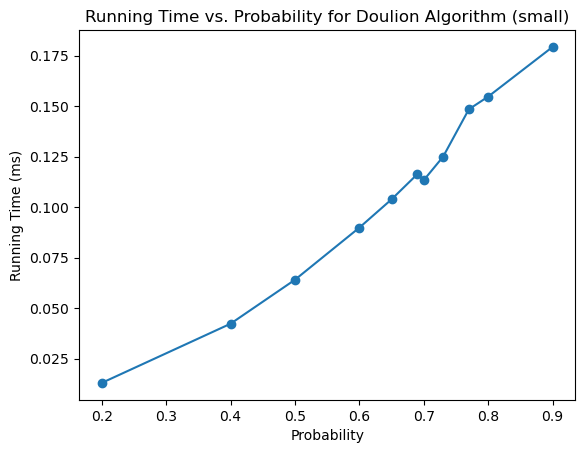

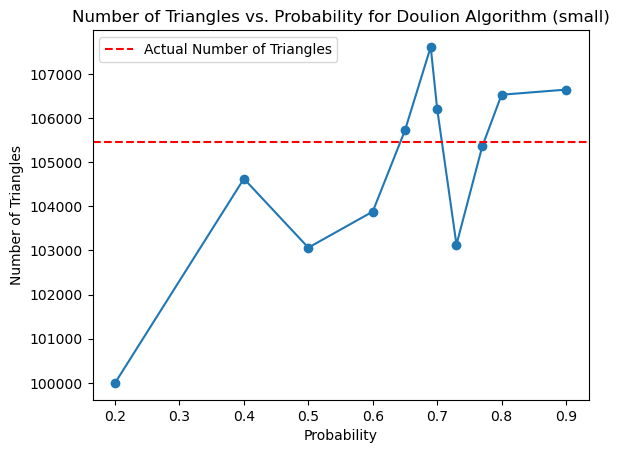

In [8]:
probabilities = list(loaded_doulion_res_s.keys())
running_times = [entry[0] for entry in loaded_doulion_res_s.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time (ms)')
plt.title('Running Time vs. Probability for Doulion Algorithm (small)')
plt.show()

actual_triangles = 105461

probabilities = list(loaded_doulion_res_s.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_s.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (small)')
plt.legend()
plt.show()

In [23]:
running_time_exact = loaded_node_iter_res_m[0]
running_time_approx = loaded_doulion_res_m[0.73][0]

speedup_factor = running_time_exact / running_time_approx

print(f"Approximate is {speedup_factor:.2f} times faster than Exact (MEdium Graph).")

Approximate is 1.76 times faster than Exact (MEdium Graph).


In [7]:
actual_count = loaded_node_iter_res_m[1]

print(f"Errors for DOULION - medium")
for prob, data in loaded_doulion_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"Prob: {prob} -> {error_percentage} (%)")

Errors for DOULION - medium
Prob: 0.2 -> 0.06911141514871903 (%)
Prob: 0.4 -> 1.1674945484116583 (%)
Prob: 0.5 -> 0.6641059432117273 (%)
Prob: 0.6 -> 0.2181375287563423 (%)
Prob: 0.65 -> 0.8405102405506419 (%)
Prob: 0.69 -> 0.29450046283929526 (%)
Prob: 0.7 -> 1.106744578564658 (%)
Prob: 0.73 -> 0.119946042779522 (%)
Prob: 0.77 -> 0.13023136045154762 (%)
Prob: 0.8 -> 0.41511246143930813 (%)
Prob: 0.9 -> 0.341117370273656 (%)


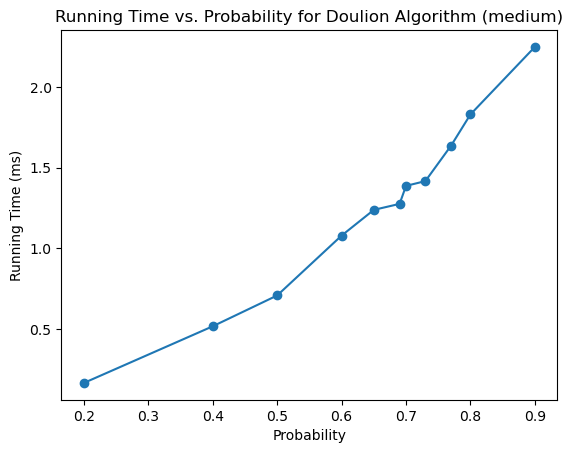

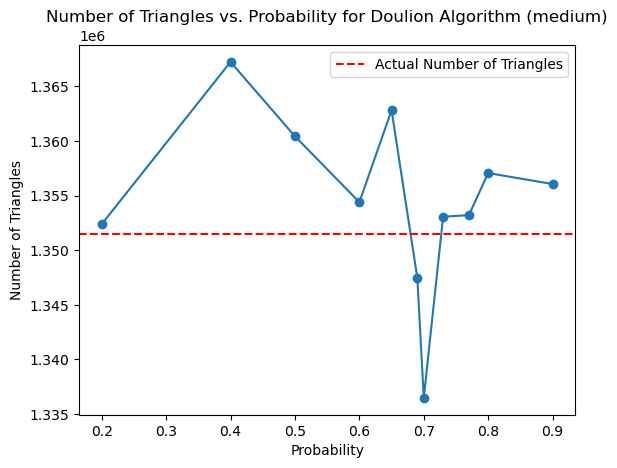

In [86]:
probabilities = list(loaded_doulion_res_m.keys())
running_times = [entry[0] for entry in loaded_doulion_res_m.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time (ms)')
plt.title('Running Time vs. Probability for Doulion Algorithm (medium)')
plt.show()

actual_triangles = 1351441

probabilities = list(loaded_doulion_res_m.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_m.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (medium)')
plt.legend()
plt.show()

In [9]:
running_time_exact = loaded_node_iter_res_b[0]
running_time_approx = loaded_doulion_res_b[0.7][0]

speedup_factor = running_time_exact / running_time_approx

print(f"Approximate is {speedup_factor:.2f} times faster than Exact (Big Graph).")

Approximate is 0.40 times faster than Exact (Big Graph).


In [8]:
actual_count = loaded_node_iter_res_b[1]

print(f"Errors for DOULION - big")
for prob, data in loaded_doulion_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"Prob: {prob} -> {error_percentage} (%)")

Errors for DOULION - big
Prob: 0.2 -> 7.408786299329859 (%)
Prob: 0.4 -> 2.91734921816828 (%)
Prob: 0.5 -> 0.24125093075204768 (%)
Prob: 0.6 -> 0.12062546537602384 (%)
Prob: 0.65 -> 1.3343261355174982 (%)
Prob: 0.69 -> 0.2472077438570365 (%)
Prob: 0.7 -> 0.11466865227103498 (%)
Prob: 0.73 -> 0.193596425912137 (%)
Prob: 0.77 -> 0.39463886820551003 (%)
Prob: 0.8 -> 0.05361131794489948 (%)
Prob: 0.9 -> 0.2695457930007446 (%)


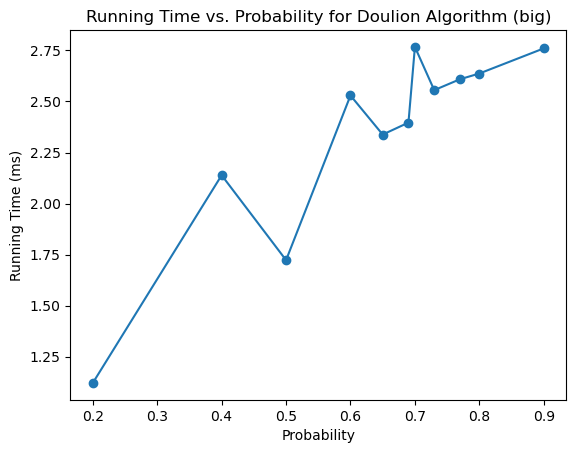

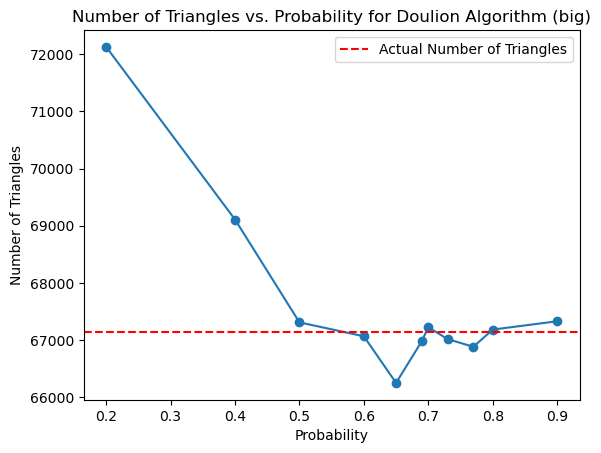

In [87]:
probabilities = list(loaded_doulion_res_b.keys())
running_times = [entry[0] for entry in loaded_doulion_res_b.values()]

plt.plot(probabilities, running_times, marker='o')
plt.xlabel('Probability')
plt.ylabel('Running Time (ms)')
plt.title('Running Time vs. Probability for Doulion Algorithm (big)')
plt.show()

actual_triangles = 67150

probabilities = list(loaded_doulion_res_b.keys())
num_triangles_predicted = [int(entry[1]) for entry in loaded_doulion_res_b.values()]

plt.plot(probabilities, num_triangles_predicted, marker='o')
plt.axhline(y=actual_triangles, color='red', linestyle='--', label='Actual Number of Triangles')

plt.xlabel('Probability')
plt.ylabel('Number of Triangles')
plt.title('Number of Triangles vs. Probability for Doulion Algorithm (big)')
plt.legend()
plt.show()

Errors for DOULION - medium
Errors for DOULION - small
Errors for DOULION - big


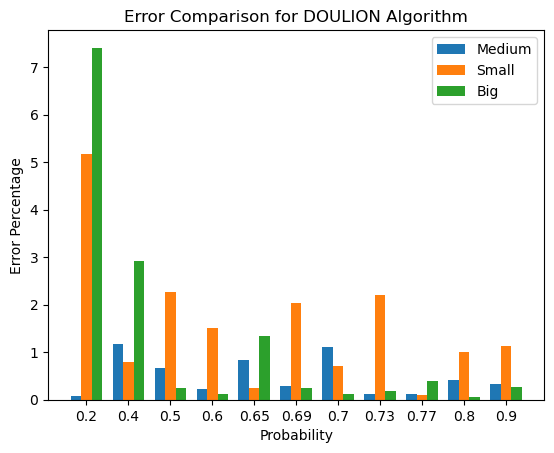

In [10]:
import matplotlib.pyplot as plt
import numpy as np

actual_count_medium = loaded_node_iter_res_m[1]
errors_medium = []

print("Errors for DOULION - medium")
for prob, data in loaded_doulion_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_medium) / actual_count_medium) * 100
    errors_medium.append(error_percentage)

# Calculate errors for small graph
actual_count_small = loaded_node_iter_res_s[1]
errors_small = []

print("Errors for DOULION - small")
for prob, data in loaded_doulion_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_small) / actual_count_small) * 100
    errors_small.append(error_percentage)

# Calculate errors for big graph
actual_count_big = loaded_node_iter_res_b[1]
errors_big = []

print("Errors for DOULION - big")
for prob, data in loaded_doulion_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_big) / actual_count_big) * 100
    errors_big.append(error_percentage)

# Probabilities
probs = list(loaded_doulion_res_m.keys())  # You can use any list with the appropriate length

# Set up the figure and axis
fig, ax = plt.subplots()
bar_width = 0.25
index = np.arange(len(probs))

# Plot the bars
bar1 = ax.bar(index - bar_width, errors_medium, bar_width, label='Medium')
bar2 = ax.bar(index, errors_small, bar_width, label='Small')
bar3 = ax.bar(index + bar_width, errors_big, bar_width, label='Big')

# Add labels, title, and legend
ax.set_xlabel('Probability')
ax.set_ylabel('Error Percentage')
ax.set_title('Error Comparison for DOULION Algorithm')
ax.set_xticks(index)
ax.set_xticklabels(probs)
ax.legend()

# Show the plot
plt.show()


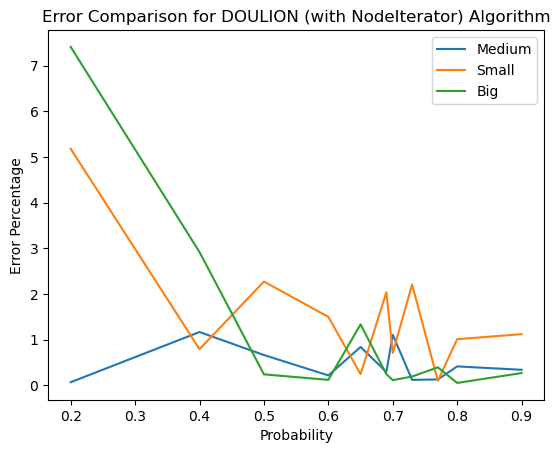

In [12]:
plt.plot(list(loaded_doulion_res_m.keys()), errors_medium, label='Medium')
plt.plot(list(loaded_doulion_res_s.keys()), errors_small, label='Small')
plt.plot(list(loaded_doulion_res_b.keys()), errors_big, label='Big')

# Add labels, title, and legend
plt.xlabel('Probability')
plt.ylabel('Error Percentage')
plt.title('Error Comparison for DOULION (with NodeIterator) Algorithm')
plt.legend()

# Show the plot
plt.show()

# Triest

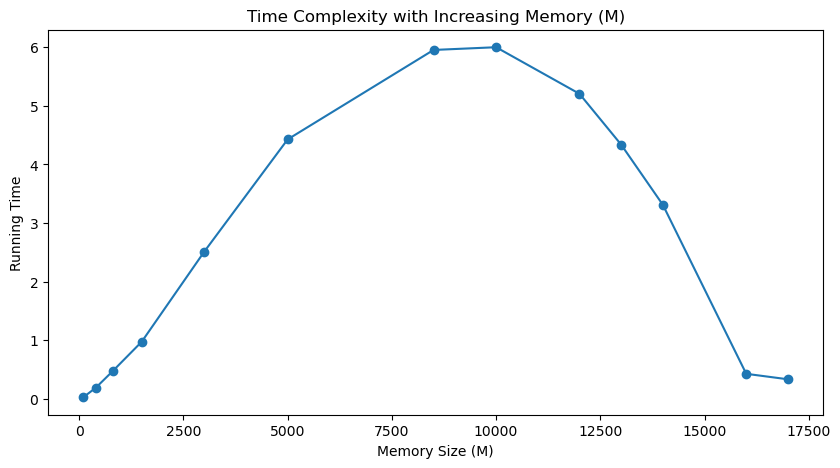

In [88]:
memory_sizes = list(loaded_t_base_res_s.keys())
running_times = [entry[0] for entry in loaded_t_base_res_s.values()]

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, running_times, marker='o')
plt.title('Time Complexity with Increasing Memory (M)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.show()


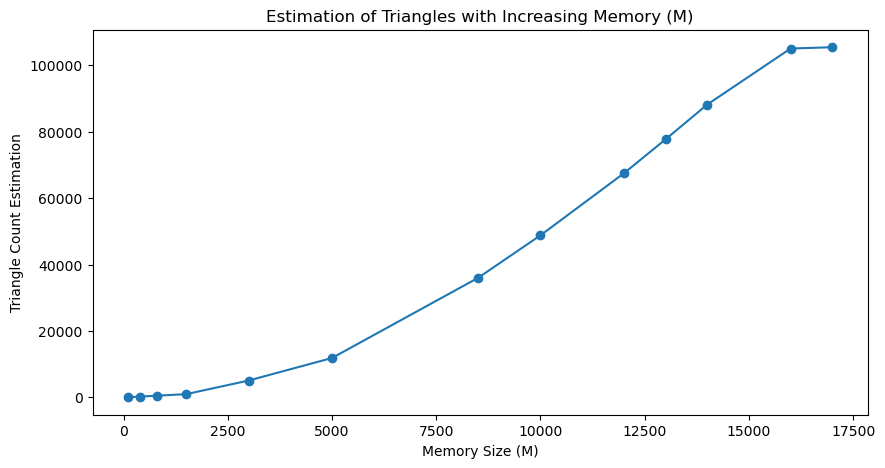

In [89]:
triangle_estimations = [entry[1] for entry in loaded_t_base_res_s.values()]

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, triangle_estimations, marker='o')
plt.title('Estimation of Triangles with Increasing Memory (M)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.show()

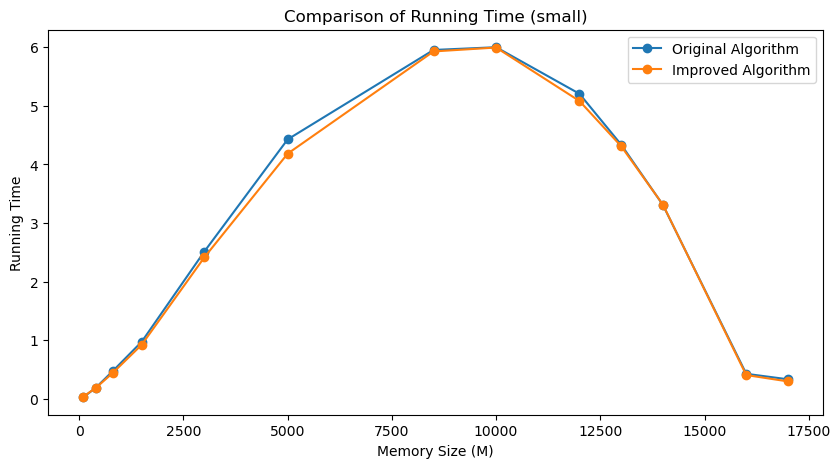

In [92]:
memory_sizes = list(loaded_t_base_res_s.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_s.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (small)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

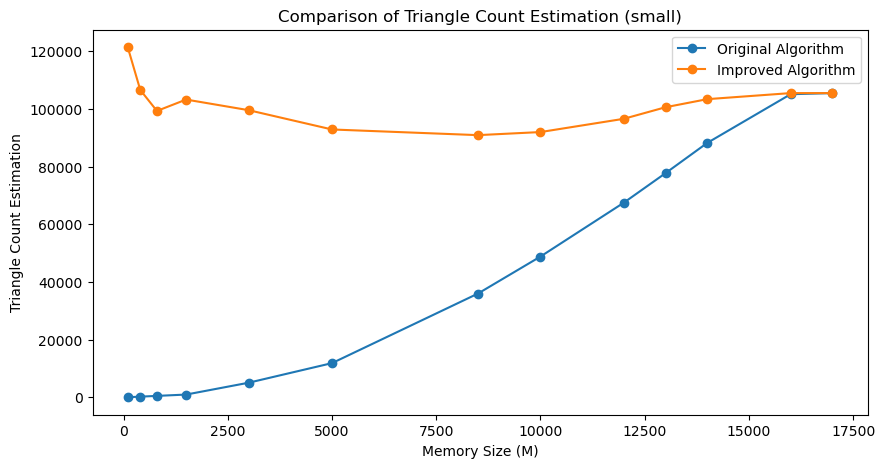

In [93]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_s.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_s.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation (small)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

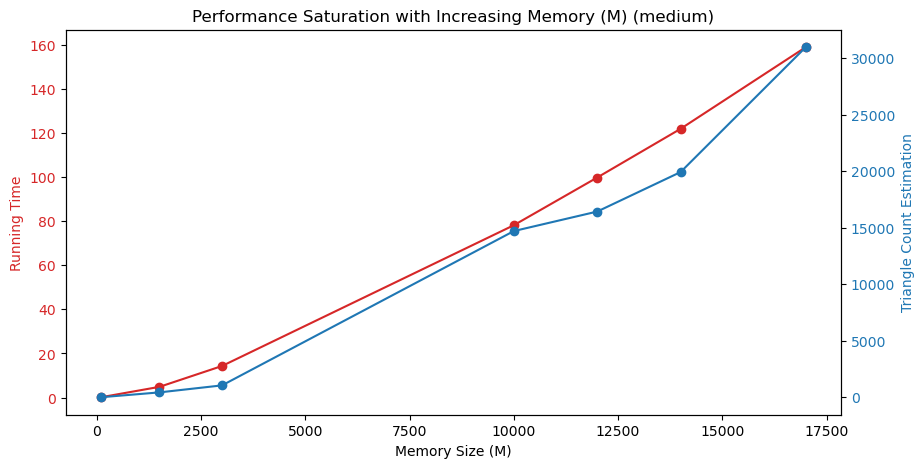

In [96]:
memory_sizes = list(loaded_t_base_res_m.keys())
running_times = [entry[0] for entry in loaded_t_base_res_m.values()]
triangle_estimations = [entry[1] for entry in loaded_t_base_res_m.values()]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time', color=color)
ax1.plot(memory_sizes, running_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Triangle Count Estimation', color=color)
ax2.plot(memory_sizes, triangle_estimations, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance Saturation with Increasing Memory (M) (medium)')
plt.show()

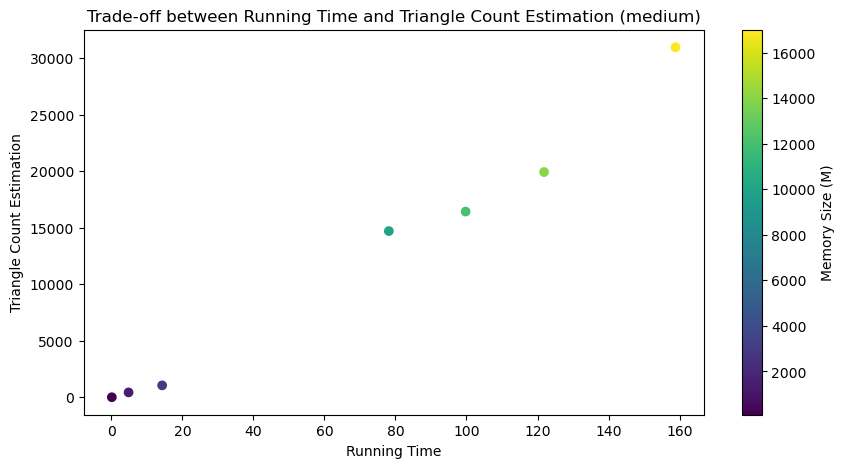

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(running_times, triangle_estimations, c=memory_sizes, cmap='viridis', marker='o')
plt.title('Trade-off between Running Time and Triangle Count Estimation (medium)')
plt.xlabel('Running Time')
plt.ylabel('Triangle Count Estimation')
plt.colorbar(label='Memory Size (M)')
plt.show()

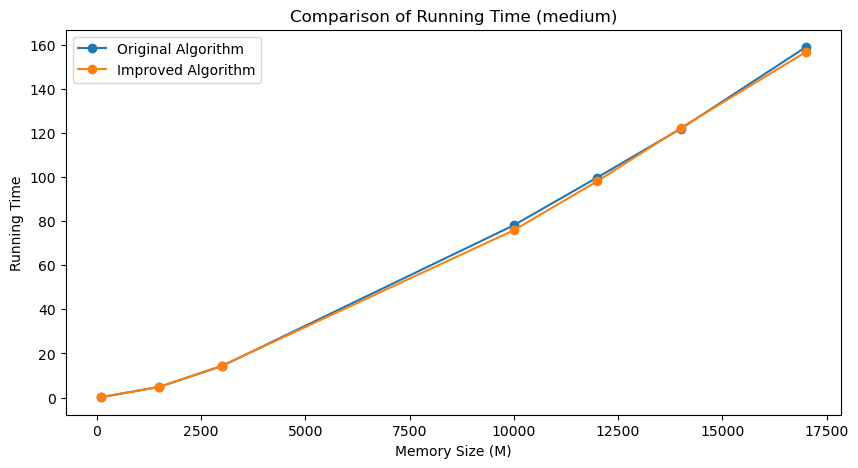

In [98]:
memory_sizes = list(loaded_t_base_res_m.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_m.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (medium)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

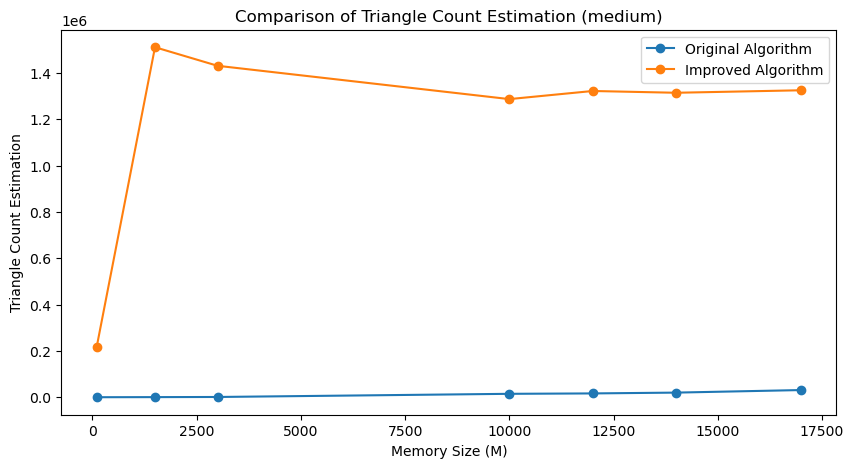

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_m.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_m.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation (medium)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

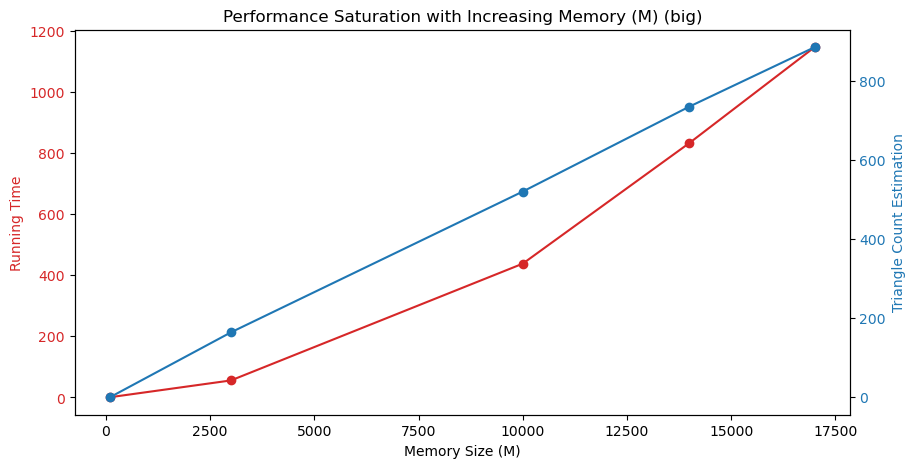

In [102]:
memory_sizes = list(loaded_t_base_res_b.keys())
running_times = [entry[0] for entry in loaded_t_base_res_b.values()]
triangle_estimations = [entry[1] for entry in loaded_t_base_res_b.values()]

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Memory Size (M)')
ax1.set_ylabel('Running Time', color=color)
ax1.plot(memory_sizes, running_times, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Triangle Count Estimation', color=color)
ax2.plot(memory_sizes, triangle_estimations, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Performance Saturation with Increasing Memory (M) (big)')
plt.show()

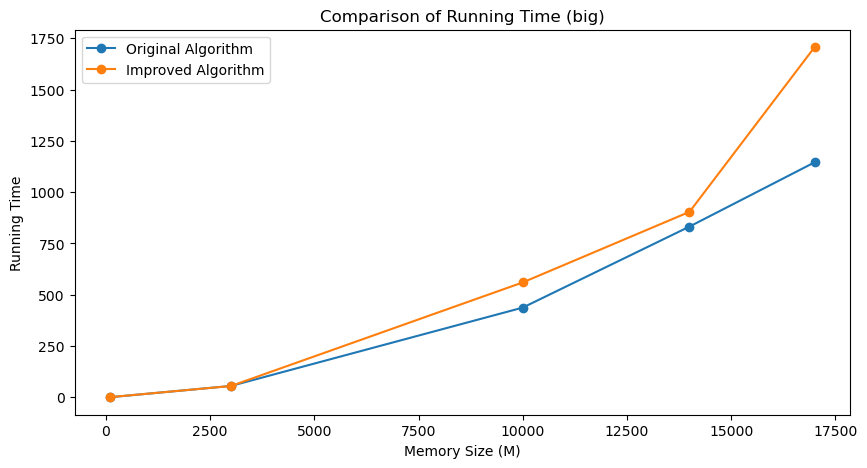

In [104]:
memory_sizes = list(loaded_t_base_res_b.keys())

plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_base_res_b.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[0] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Running Time (big)')
plt.xlabel('Memory Size (M)')
plt.ylabel('Running Time')
plt.legend()
plt.show()

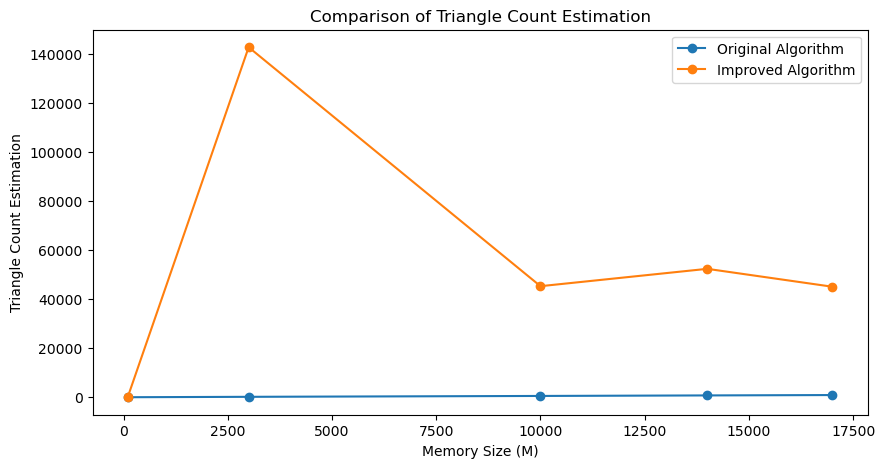

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_base_res_b.values()], label='Original Algorithm', marker='o')
plt.plot(memory_sizes, [entry[1] for entry in loaded_t_impr_res_b.values()], label='Improved Algorithm', marker='o')
plt.title('Comparison of Triangle Count Estimation')
plt.xlabel('Memory Size (M)')
plt.ylabel('Triangle Count Estimation')
plt.legend()
plt.show()

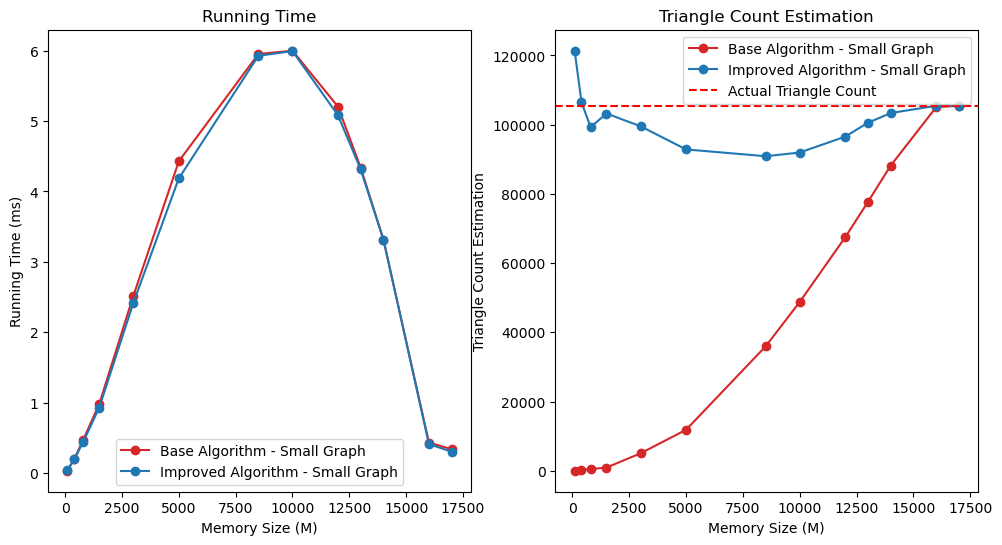

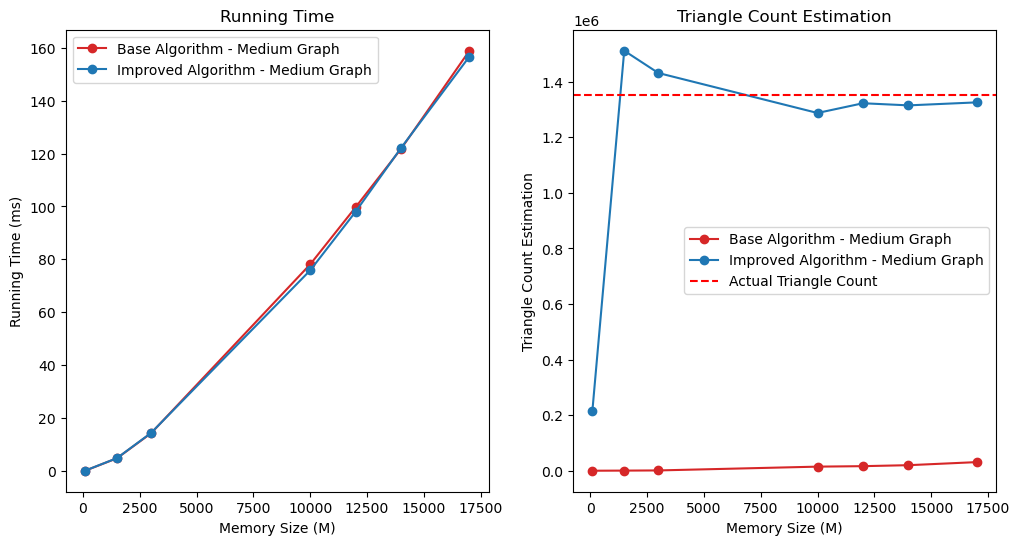

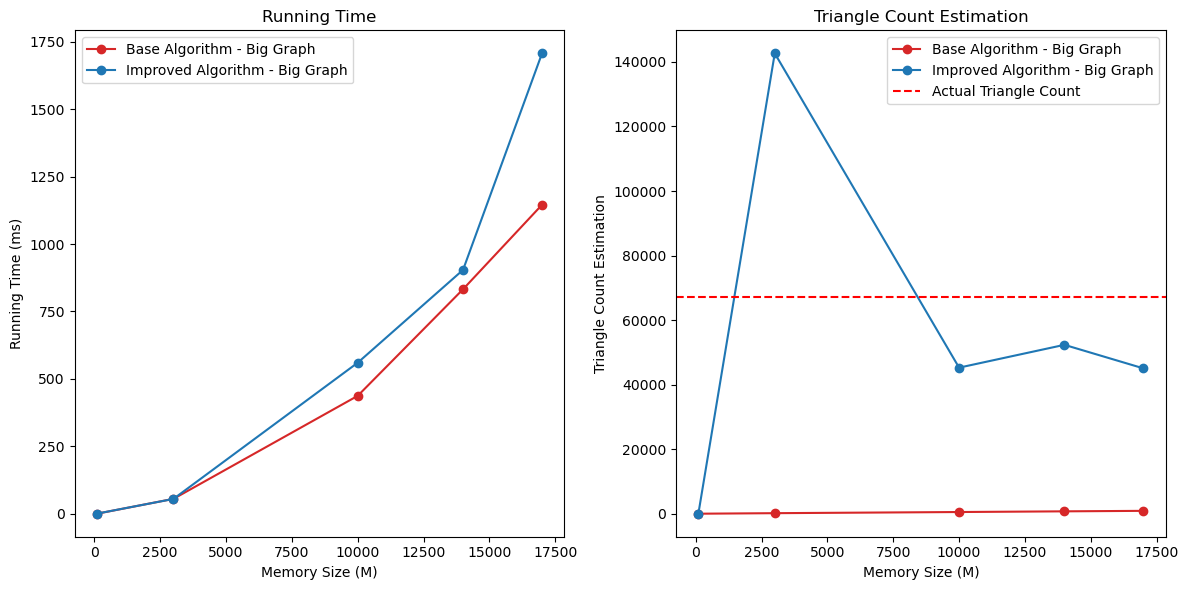

In [109]:
import matplotlib.pyplot as plt

def plot_combined_performance(memory_sizes, running_times_base, 
                              running_times_impr, triangle_estimations_base,
                              triangle_estimations_impr, graph_size):
    plt.figure(figsize=(12, 6))

    # Plot Running Time
    plt.subplot(1, 2, 1)
    plt.plot(memory_sizes, running_times_base, 
             label=f'Base Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:red')
    
    plt.plot(memory_sizes, running_times_impr, 
             label=f'Improved Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:blue')
    
    plt.title('Running Time')
    plt.xlabel('Memory Size (M)')
    plt.ylabel('Running Time (ms)')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(memory_sizes, triangle_estimations_base, 
             label=f'Base Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:red')
    plt.plot(memory_sizes, triangle_estimations_impr, 
             label=f'Improved Algorithm - {graph_size} Graph', 
             marker='o', linestyle='-', color='tab:blue')
    plt.axhline(y=105461 if graph_size == 'Small' else (1351441 if graph_size == 'Medium' else 67150), color='red', linestyle='--', label='Actual Triangle Count')  # Corrected line
    plt.title('Triangle Count Estimation')
    plt.xlabel('Memory Size (M)')
    plt.ylabel('Triangle Count Estimation')
    plt.legend()


plot_combined_performance(
    list(loaded_t_base_res_s.keys()),
    [entry[0] for entry in loaded_t_base_res_s.values()],
    [entry[0] for entry in loaded_t_impr_res_s.values()],
    [entry[1] for entry in loaded_t_base_res_s.values()],
    [entry[1] for entry in loaded_t_impr_res_s.values()],
    'Small'
)

plot_combined_performance(
    list(loaded_t_base_res_m.keys()),
    [entry[0] for entry in loaded_t_base_res_m.values()],
    [entry[0] for entry in loaded_t_impr_res_m.values()],
    [entry[1] for entry in loaded_t_base_res_m.values()],
    [entry[1] for entry in loaded_t_impr_res_m.values()],
    'Medium'
)

plot_combined_performance(
    list(loaded_t_base_res_b.keys()),
    [entry[0] for entry in loaded_t_base_res_b.values()],
    [entry[0] for entry in loaded_t_impr_res_b.values()],
    [entry[1] for entry in loaded_t_base_res_b.values()],
    [entry[1] for entry in loaded_t_impr_res_b.values()],
    'Big'
)

plt.tight_layout()
plt.show()

In [31]:
actual_count = loaded_node_iter_res_s[1]

print(f"Errors for Triest base - small")
for prob, data in loaded_t_base_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest base - small
M: 100 -> 99.98672495045562 (%)
M: 400 -> 99.79708138553589 (%)
M: 800 -> 99.54864831549104 (%)
M: 1500 -> 99.11246811617565 (%)
M: 3000 -> 95.21718929272433 (%)
M: 5000 -> 88.77499739240098 (%)
M: 8500 -> 65.91062098785333 (%)
M: 10000 -> 53.73645233783104 (%)
M: 12000 -> 36.020898720854156 (%)
M: 13000 -> 26.318733939560595 (%)
M: 14000 -> 16.383307573415763 (%)
M: 16000 -> 0.3717013872426774 (%)
M: 17000 -> 0.0 (%)


In [32]:
actual_count = loaded_node_iter_res_m[1]

print(f"Errors for Triest base - med")
for prob, data in loaded_t_base_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest base - med
M: 100 -> 99.999556029453 (%)
M: 1500 -> 99.9678861304341 (%)
M: 3000 -> 99.9220091739114 (%)
M: 10000 -> 98.91182818931792 (%)
M: 12000 -> 98.784112661966 (%)
M: 14000 -> 98.52557381343323 (%)
M: 17000 -> 97.70837202659976 (%)


In [33]:
actual_count = loaded_node_iter_res_b[1]

print(f"Errors for Triest base - big")
for prob, data in loaded_t_base_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest base - big
M: 100 -> 100.0 (%)
M: 3000 -> 99.75577066269545 (%)
M: 10000 -> 99.22561429635145 (%)
M: 14000 -> 98.90543559195831 (%)
M: 17000 -> 98.68205510052123 (%)


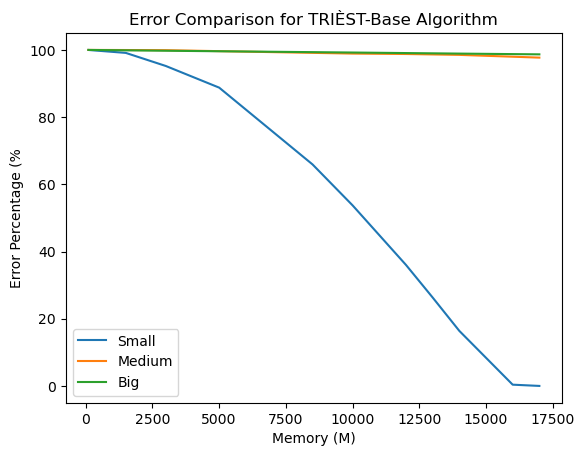

In [20]:
actual_count_small = loaded_node_iter_res_s[1]
errors_t_base_small = []

for prob, data in loaded_t_base_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_small) / actual_count_small) * 100
    errors_t_base_small.append(error_percentage)

# Calculate errors for medium graph
actual_count_medium = loaded_node_iter_res_m[1]
errors_t_base_medium = []

for prob, data in loaded_t_base_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_medium) / actual_count_medium) * 100
    errors_t_base_medium.append(error_percentage)

# Calculate errors for big graph
actual_count_big = loaded_node_iter_res_b[1]
errors_t_base_big = []

for prob, data in loaded_t_base_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_big) / actual_count_big) * 100
    errors_t_base_big.append(error_percentage)

# Plotting line plot for Triest Base
plt.plot(list(loaded_t_base_res_s.keys()), errors_t_base_small, label='Small')
plt.plot(list(loaded_t_base_res_m.keys()), errors_t_base_medium, label='Medium')
plt.plot(list(loaded_t_base_res_b.keys()), errors_t_base_big, label='Big')

# Add labels, title, and legend
plt.xlabel('Memory (M)')
plt.ylabel('Error Percentage (%')
plt.title('Error Comparison for TRIÈST-Base Algorithm')
plt.legend()

# Show the plot
plt.show()

In [34]:
actual_count = loaded_node_iter_res_s[1]

print(f"Errors for Triest impr - small")
for prob, data in loaded_t_impr_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest impr - small
M: 100 -> 15.081404500241796 (%)
M: 400 -> 1.0345056466371456 (%)
M: 800 -> 5.864727245142754 (%)
M: 1500 -> 2.124956144925612 (%)
M: 3000 -> 5.616294175097904 (%)
M: 5000 -> 11.959871421662985 (%)
M: 8500 -> 13.822171229174765 (%)
M: 10000 -> 12.81042281032799 (%)
M: 12000 -> 8.447672599349522 (%)
M: 13000 -> 4.648163776182665 (%)
M: 14000 -> 1.9941020851309963 (%)
M: 16000 -> 0.0 (%)
M: 17000 -> 0.0 (%)


In [35]:
actual_count = loaded_node_iter_res_m[1]

print(f"Errors for Triest impr - med")
for prob, data in loaded_t_impr_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest impr - med
M: 100 -> 84.02653167988836 (%)
M: 1500 -> 11.843358311609608 (%)
M: 3000 -> 5.911171852859281 (%)
M: 10000 -> 4.735833824784064 (%)
M: 12000 -> 2.1427498499749524 (%)
M: 14000 -> 2.7103661943066695 (%)
M: 17000 -> 1.913143082087934 (%)


In [36]:
actual_count = loaded_node_iter_res_b[1]

print(f"Errors for Triest impr - big")
for prob, data in loaded_t_impr_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count) / actual_count) * 100
    print(f"M: {prob} -> {error_percentage} (%)")

Errors for Triest impr - big
M: 100 -> 99.91064780342516 (%)
M: 3000 -> 112.44378257632167 (%)
M: 10000 -> 32.598659717051376 (%)
M: 14000 -> 22.06999255398362 (%)
M: 17000 -> 32.92777364110201 (%)


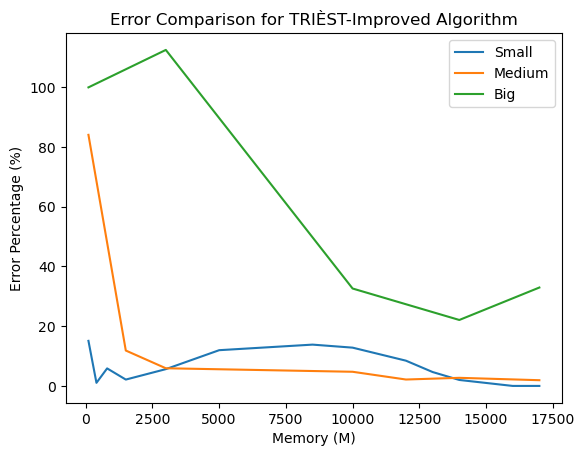

In [21]:
# Calculate errors for small graph
actual_count_small = loaded_node_iter_res_s[1]
errors_t_impr_small = []

for prob, data in loaded_t_impr_res_s.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_small) / actual_count_small) * 100
    errors_t_impr_small.append(error_percentage)

# Calculate errors for medium graph
actual_count_medium = loaded_node_iter_res_m[1]
errors_t_impr_medium = []

for prob, data in loaded_t_impr_res_m.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_medium) / actual_count_medium) * 100
    errors_t_impr_medium.append(error_percentage)

# Calculate errors for big graph
actual_count_big = loaded_node_iter_res_b[1]
errors_t_impr_big = []

for prob, data in loaded_t_impr_res_b.items():
    observed_count = int(data[1])
    error_percentage = abs((observed_count - actual_count_big) / actual_count_big) * 100
    errors_t_impr_big.append(error_percentage)

# Plotting line plot for Triest Improv
plt.plot(list(loaded_t_impr_res_s.keys()), errors_t_impr_small, label='Small')
plt.plot(list(loaded_t_impr_res_m.keys()), errors_t_impr_medium, label='Medium')
plt.plot(list(loaded_t_impr_res_b.keys()), errors_t_impr_big, label='Big')

# Add labels, title, and legend
plt.xlabel('Memory (M)')
plt.ylabel('Error Percentage (%)')
plt.title('Error Comparison for TRIÈST-Improved Algorithm')
plt.legend()

# Show the plot
plt.show()

In [ ]:

"""
Starting by reading the graph
Removing self loops
Preprocessing done
Starting DOULION at 113.10879
Doulion with NodeIterator Results: 286394000, p=.1
Elapsed time: 46.499082000000016
Starting Triest Base at 159.607916
Triest base result: 425, M = 15000
Elapsed time: 3094.0586639999997
Starting Triest Improved at 3253.666609
Triest improved result: 303334685, M = 15000
Elapsed time: 3351.4585100000004

Starting by reading the graph
Removing self loops
Preprocessing done
Starting DOULION at 223.94496
Doulion with NodeIterator Results: 284996500, p=.2
Elapsed time: 205.95982999999998
Starting Triest Base at 429.904872
Triest base result: 512, M = 17000
Elapsed time: 4628.413779
Starting Triest Improved at 5058.318683
Triest improved result: 289502636, M = 17000
Elapsed time: 4194.098529
"""